<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/RO/cvicenia/notebooky/cv10_en_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10th Lab - Initial Data Analysis, Visualization and Clustering

In this lab we will cover some basics of initial data analysis and visualization. Since both simple initial data analysis and data visualization usually mostly depends on calling the correct functions on the data we will cover them 

Then we will move onto clustering where we will implement our own k-means clustering method.

## Initial Data Analysis

We will load the car dataset we have already used before and do some basic data analysis.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2022-04-25 17:41:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.3’

adult.data.3        100%[===================>]   3.79M  9.52MB/s    in 0.4s    

2022-04-25 17:41:10 (9.52 MB/s) - ‘adult.data.3’ saved [3974305/3974305]



In [ ]:
import pandas as pd
data = pd.read_csv('adult.data', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary'], sep=",")
print(data.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50

We can learn most important information by calling the `describe` method on the dataframe. We can also use the `info` method for more information. The `info` method is important as it shows whether the data contains empty fields. It also shows the type of data.

In [ ]:
print(data.describe(include='all'))
print(30 * '*')
print(data.info())

                 age workclass        fnlwgt education  education-num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

             marital-status       occupation relationship    race    sex  \
count                 32561            32561   

We can also check for empty values directly. Empty values are `None` or various types of NaN values for floats.



In [ ]:
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


## Visualization

We can also perform some basic visualization. For instance we may be interested in histograms for the various features. Pandas directly enables us to draw a histogram using the `DataFrame` `plot.hist` method.

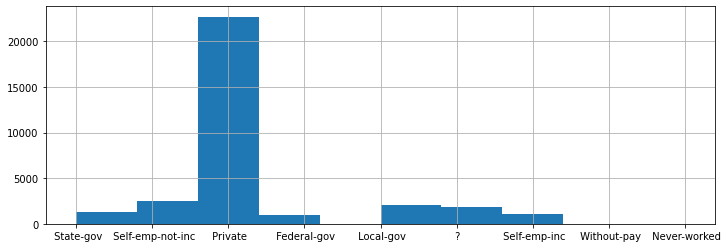

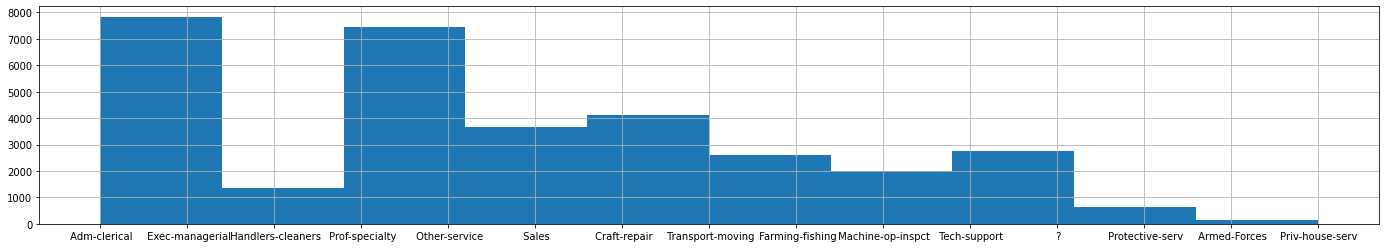

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 4))
data.workclass.hist()
plt.show()

plt.figure(figsize=(24, 4))
data.occupation.hist()
plt.show()

We can also show histograms of numerical values, but we may need to define how many bins we are interested in.

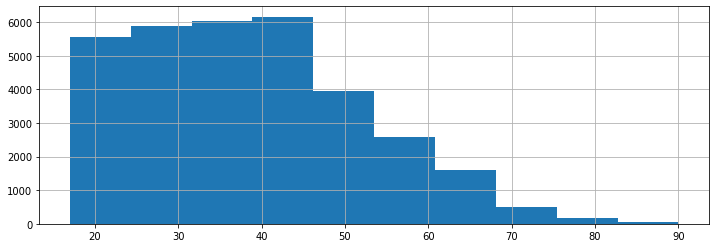

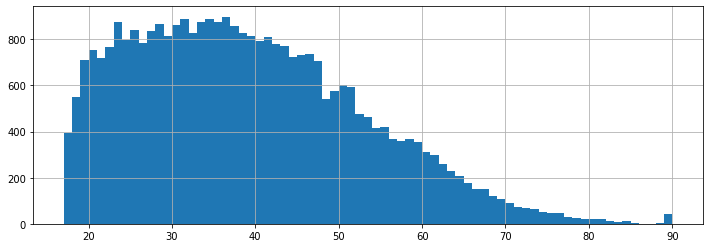

In [ ]:
plt.figure(figsize=(12, 4))
data.age.hist()
plt.show()


plt.figure(figsize=(12, 4))
data.age.hist(bins=data.age.max() - data.age.min())
plt.show()

## Nicer plots with Seaborn

For nicer visualizations we can use the [Seaborn package](https://seaborn.pydata.org/index.html). We will not cover all of its possibilities here as any exercises would just require you to call one of the package functions properly. If you are interested in more you can check out its many tutorials. For example [this one on visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html).

With seaborn we can for example visualise more complex data relationships. We can for instance visualize the ages together with sex and occupation of the people represented in the data. For this we can use the [countplot](https://) from the Seaborn library.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


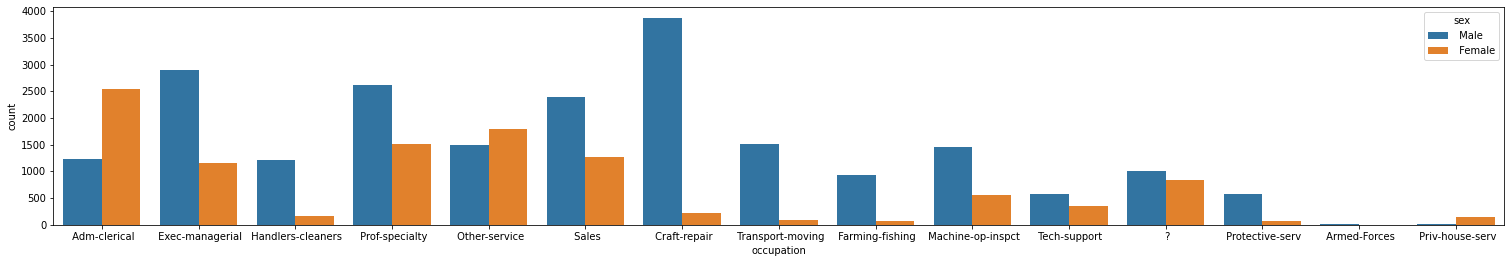

In [ ]:
import seaborn as sns
plt.figure(figsize=(26, 4))
sns.countplot(data["occupation"], hue=data["sex"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


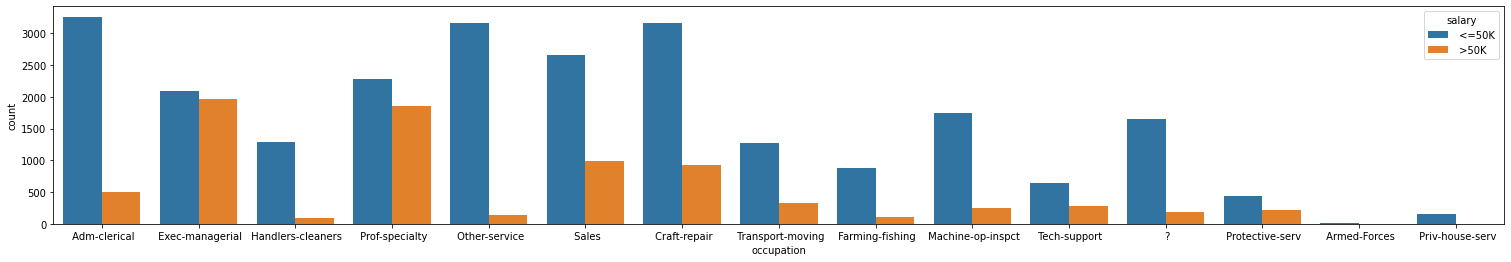

In [ ]:
plt.figure(figsize=(26, 4))
sns.countplot(data["occupation"], hue=data["salary"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


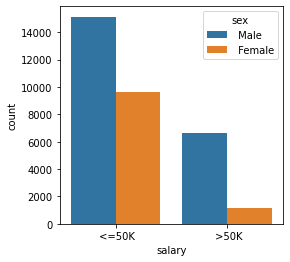

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(data["salary"], hue=data["sex"])

The catplot method allows us to visualize 3 different data features at once! See some examples.

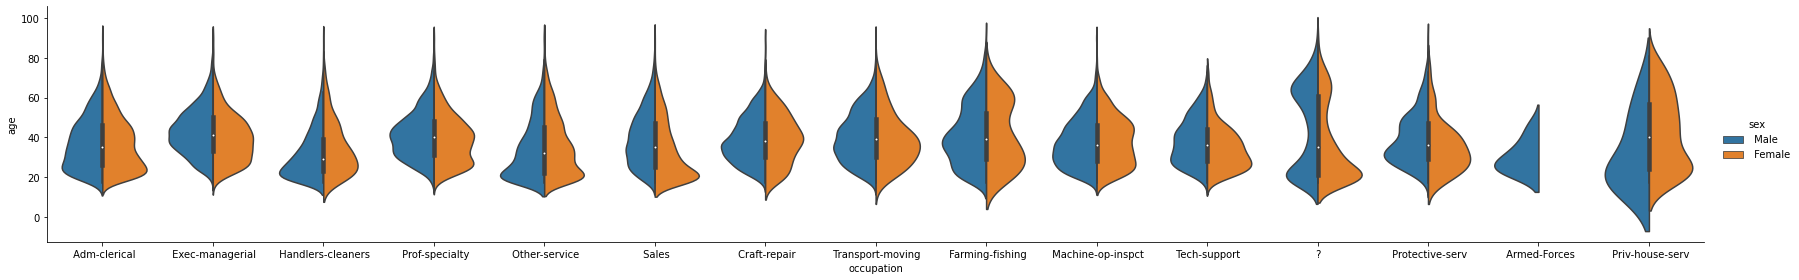

In [ ]:
sns.catplot(x="occupation", y="age", hue="sex", kind="violin", split=True, data=data, height=4, aspect=24/4)

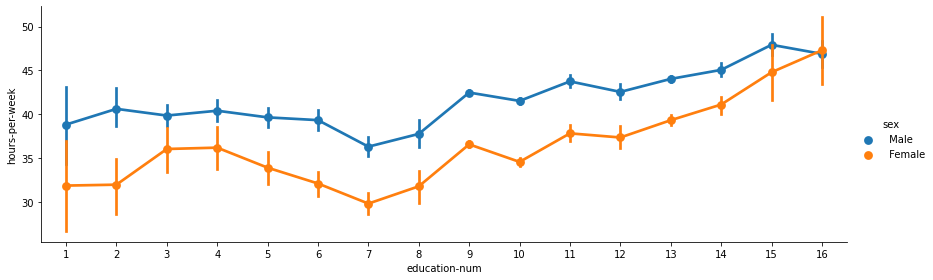

In [ ]:
sns.catplot(x="education-num", y="hours-per-week", hue="sex", kind="point", data=data, height=4, aspect=12/4)

## Clustering

In this lab we will not cover standard sklearn clustering methods as you can easily find them in [the documentation](https://scikit-learn.org/stable/modules/clustering.html). Instead we will implement our own k-Means clustering algorithm.

First we will need to generate some random data for clustering.

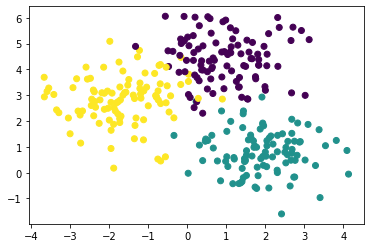

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=0.9, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Exercise - k-means clustering algorithm

Implement your own version of k-means clustering algorithm. 

The clustering algorithm works by iteratively moving k centers in two steps:

1. Every data point is assigned to the center closest to it.
2. The centers are moved to a position defined as the center of all of the data points assigned to it in the previous step.

These two steps repeat until the centers do not change between iterations. The algorithm is initialized with the k centers determined randomly. It is also possible that in step 1 there will be a center which will not be assigned any data points. In that case the new center position will be determined randomly (same as during initialization).

*Notes:* 

* We will initialize the random centers using the uniform distribution (e.g. `np.random.rand()`) spanning from the lowest to the highest value for each feature. You can also try a different initialization strategy such as selecting a random data point.

* We will also set a `max_iter` threshold as a keyword argument which will stop the algorithm after cetrain number of iterations. This is especially important during debugging as you may accidentaly create an endless loop.

* You will need to calculate distances from all points to all centers. You can implement this on your own either using for loops or broadcasting. However the best solution is to use `scipy.spatial.distance_matrix` which generates a matrix containing the distances between all points and centers. It is possible to do this in a more effective way, but that is out of the scope of this lab.

* There are multiple parts of the code where you could use a for cycle. Using numpy style code is better, but feel free to start with the for cycles and once your code works you can work on removing them.

The signature of the function will be `my_k_means(k, X, max_iter=100)` with `k` being the number of clusters, X being the data points in the shape `(num_points, num_features)`. The function will return two outputs. The first output will be an array of indices assigning each data point to a cluster via an index (e.g. `[1, 0, 2, 1, 1, 0 ...]`) and the second output will return an array of shape `(k, num_features)` cotaining the centers of clusters on each row.


In [ ]:
from scipy.spatial import distance_matrix

def my_k_means(k, X, max_iter=100):
  m = np.random.rand(k, X.shape[1])
  m *= np.max(X, axis=0) - np.min(X, axis=0)
  m += np.min(X, axis=0)

  old_m = np.zeros_like(m)
  iter = 0
  while np.any(m != old_m) and iter < max_iter:
    iter += 1
    old_m = np.copy(m)
    dist_matrix = distance_matrix(X, m)
    cluster_assignments = np.argmin(dist_matrix, axis=-1)
    for i in range(k):
      if np.sum(cluster_assignments == i) == 0:
        m[i] = np.random.rand()
        m[i] *= np.max(X, axis=0) - np.min(X, axis=0)
        m[i] += np.min(X, axis=0)
      else:
        m[i] = np.mean(X[cluster_assignments==i, :], axis=0)  

  return cluster_assignments, m

The following code will test your implementation on various randomly generated clusters.

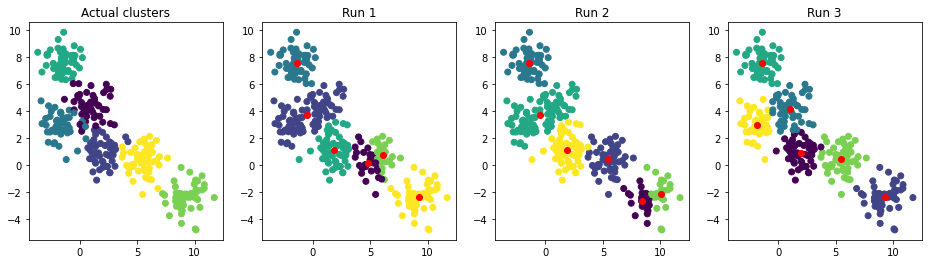

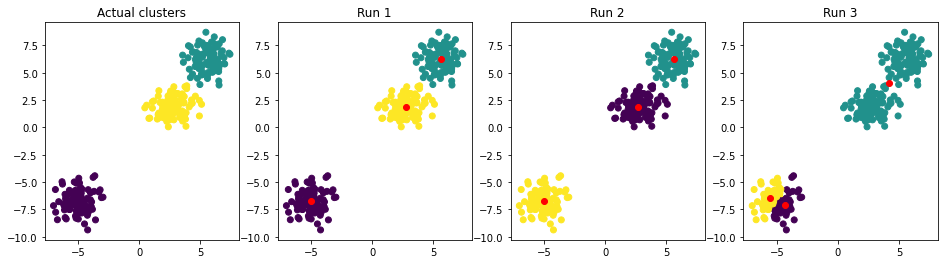

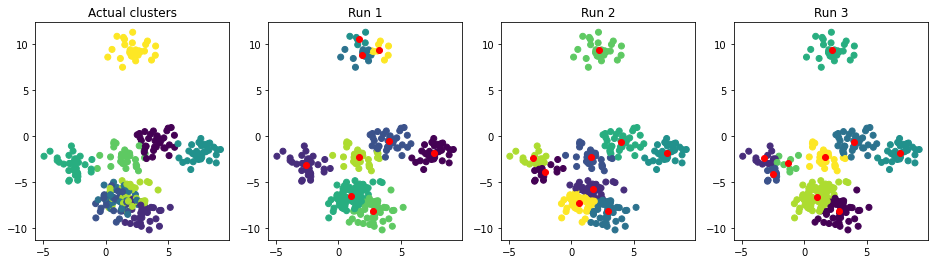

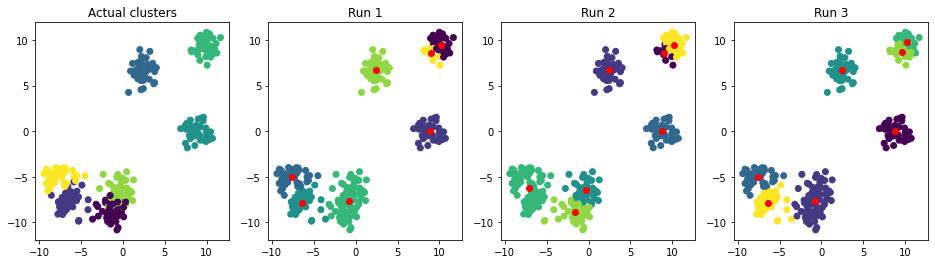

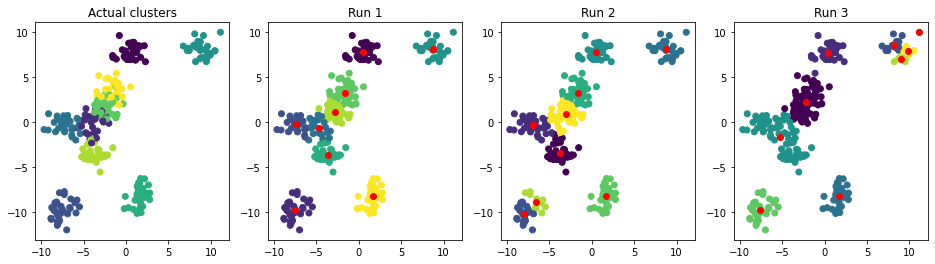

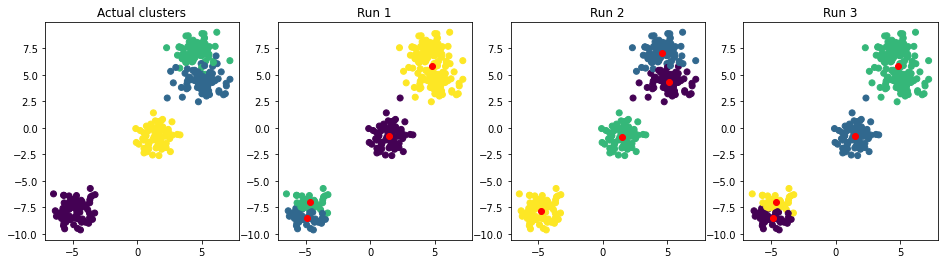

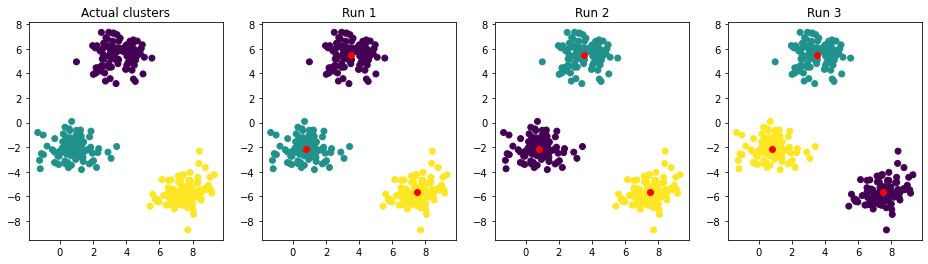

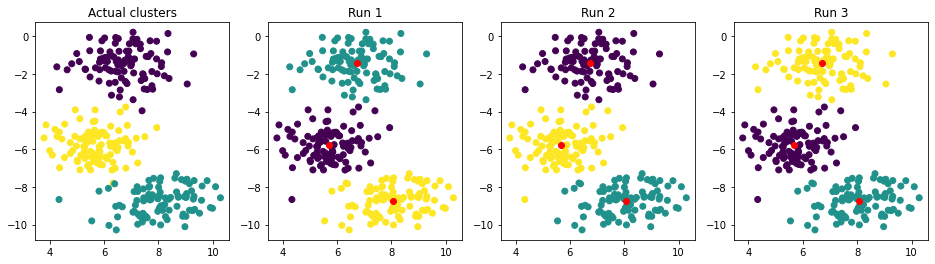

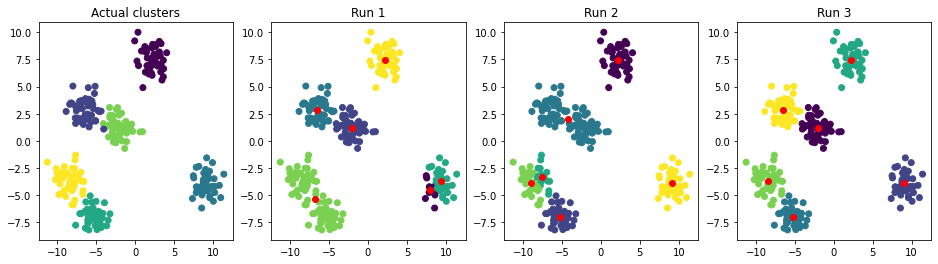

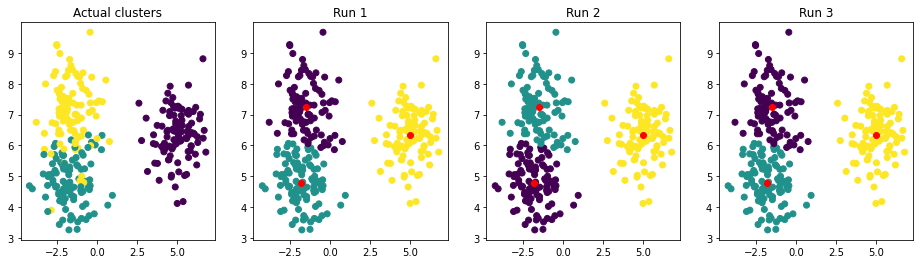

In [ ]:
for r in range(10):
  plt.figure(figsize=(16,4))

  k = np.random.randint(2, 10)

  X, y = make_blobs(n_samples=300, centers=k, n_features=2, cluster_std=0.9, random_state=456*r)
  plt.subplot(1, 4, 1)
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.title('Actual clusters')

  for i in range(3):
    assignments, m = my_k_means(k, X)
    plt.subplot(1, 4, i+2)
    plt.scatter(X[:, 0], X[:, 1], c=assignments)
    plt.scatter(m[:, 0], m[:, 1], c='r')
    plt.title('Run {}'.format(i + 1))
  plt.show()

### Exercise - Displaying the algorithm

You can try to modify the function to diplay how the process works.

In [ ]:
def my_k_means_vis(k, X, max_iter=100):
  m = np.random.rand(k, X.shape[1])
  m *= np.max(X, axis=0) - np.min(X, axis=0)
  m += np.min(X, axis=0)

  old_m = np.zeros_like(m)
  iter = 0
  while np.any(m != old_m) and iter < max_iter:
    iter += 1
    old_m = np.copy(m)
    dist_matrix = distance_matrix(X, m)
    cluster_assignments = np.argmin(dist_matrix, axis=-1)
    for i in range(k):
      if np.sum(cluster_assignments == i) == 0:
        m[i] = np.random.rand()
        m[i] *= np.max(X, axis=0) - np.min(X, axis=0)
        m[i] += np.min(X, axis=0)
      else:
        m[i] = np.mean(X[cluster_assignments==i, :], axis=0)

    plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments)
    plt.scatter(m[:, 0], m[:, 1], c='r')
    plt.plot([old_m[:, 0], m[:, 0]], [old_m[:, 1], m[:, 1]], c='r')
    plt.title('Iteration: {}'.format(iter))
    plt.show()

  return cluster_assignments, m

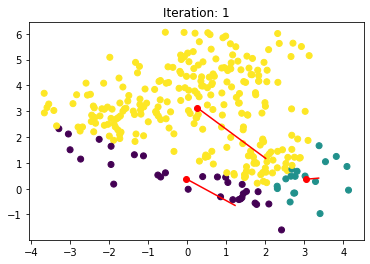

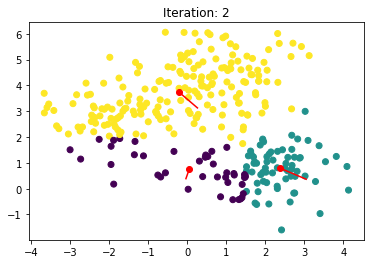

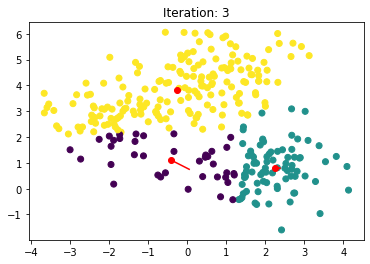

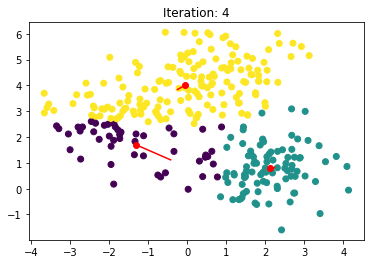

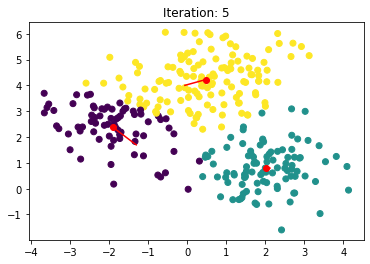

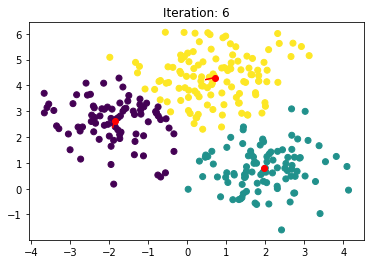

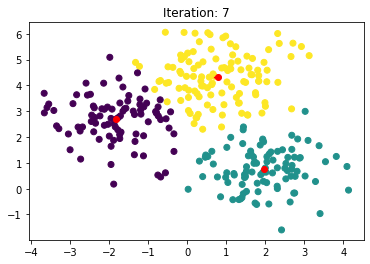

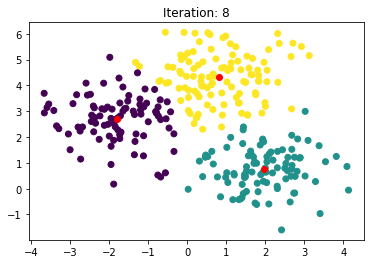

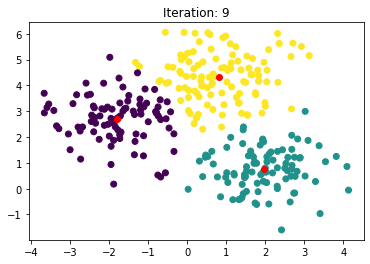

In [ ]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2, cluster_std=0.9, random_state=0)

_, _ = my_k_means_vis(3, X, max_iter=100)